In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [4]:
#Daten einlesen
df_orig = pd.read_parquet("D:/Eclipse Python/DataScience/res/event_ano.parquet.gzip")

In [20]:
df_orig['event_timestamp'] = pd.to_datetime(df_orig["event_timestamp"])
df = df_orig.set_index("event_timestamp")
df.sort_index(inplace=True)

In [21]:
line_mapping = {}
for i in range(0,28):
    line_mapping.update({"line_{}".format(i):i})

df["an_line"] = df.an_line.apply(lambda x: line_mapping[x] if x in line_mapping.keys() else x)

In [22]:
cell_mapping = {}
for i in range(0,14):
    cell_mapping.update({"cell_{}".format(i):i})

df["an_cell"] = df.an_cell.apply(lambda x: cell_mapping[x] if x in cell_mapping.keys() else x)

In [23]:
robot_mapping = {}
for i in range(0,189):
    robot_mapping.update({"robot_{}".format(i):i})

df["an_robot"] = df.an_robot.apply(lambda x: robot_mapping[x] if x in robot_mapping.keys() else x)

In [24]:
message_severity_mapping = {"Error":1,"Warning":2,"Information":3}

df["message_severity"] = df.message_severity.apply(lambda x: message_severity_mapping[x] if x in message_severity_mapping.keys() else x)

In [25]:
def dfExtractMethod(df,extract_value):
    df_extract = df.loc[df['an_line'] == extract_value]
    return df_extract

In [26]:
def dfExtractErrorWarningInformationMethod(df,extract_value):
    df_extract = df.loc[df['message_severity'] == extract_value]
    return df_extract

#df_extract_error = dfExtractErrorWarningInformationMethod(df_extract,1)
## 1 == Error
#df_extract_warning = dfExtractErrorWarningInformationMethod(df_extract,2)
## 2 == Warning
#df_extract_information = dfExtractErrorWarningInformationMethod(df_extract,3)
## 3 == Information

In [27]:
def dfRunTimePerDay(df,error_number):
    RunTimePerDay = []
    
    for i in range(0,28):
        df_extract_line = dfExtractMethod(df,i)
                
        start_time_line = df_extract_line.index[0]
        end_time_line = df_extract_line.index[-1]
        run_time_line = end_time_line - start_time_line
                
        df_extract_line_errors = dfExtractErrorWarningInformationMethod(df_extract_line,error_number)
        
        start_time_line_errors = df_extract_line_errors.index[0]
        end_time_line_errors = df_extract_line_errors.index[-1]
        run_time_line_errors = end_time_line_errors - start_time_line_errors
        
        run_time_per_day = run_time_line - run_time_line_errors
        run_time_per_day = (run_time_per_day.total_seconds()*60)
        
        RunTimePerDay.append(run_time_per_day)
    return RunTimePerDay

def dfRunTimeErrorsPerDay(df,error_number):
    RunTimeErrorsPerDay = []
    
    for i in range(0,28):
        df_extract_line = dfExtractMethod(df,i)
        
        start_time_line = df_extract_line.index[0]
        end_time_line = df_extract_line.index[-1]
        run_time_line = end_time_line - start_time_line
                
        df_extract_line_errors = dfExtractErrorWarningInformationMethod(df_extract_line,error_number)
        
        start_time_line_errors = df_extract_line_errors.index[0]
        end_time_line_errors = df_extract_line_errors.index[-1]
        run_time_line_errors = end_time_line_errors - start_time_line_errors
        
        line_errors = df_extract_line_errors.message_number.count()
        
        RunTimeErrorsPerDay.append(line_errors/((run_time_line.total_seconds())*60))
    return RunTimeErrorsPerDay

In [28]:
RunTimePerDayErrors = dfRunTimePerDay(df,1)
RunTimePerDayWarnings = dfRunTimePerDay(df,2)
RunTimePerDayInformations = dfRunTimePerDay(df,3)

In [29]:
myColumnsLineArray = np.arange(0,28)
myRunTimePerDayWarningsArray = np.asarray(RunTimePerDayWarnings)
myRunTimePerDayErrorsArray = np.asarray(RunTimePerDayErrors)
myRunTimePerDayInformationsArray = np.asarray(RunTimePerDayInformations)

df_RunTimePerDay = pd.DataFrame()
df_RunTimePerDay["Line_Run_Time"] = myColumnsLineArray
df_RunTimePerDay = df_RunTimePerDay.set_index("Line_Run_Time")
df_RunTimePerDay["Errors_Run_Time"] = myRunTimePerDayErrorsArray
#df_RunTimePerDay["Warnings_Run_Time"] = myRunTimePerDayWarningsArray
#df_RunTimePerDay["Informations_Run_Time"] = myRunTimePerDayInformationsArray
df_RunTimePerDay = df_RunTimePerDay.astype(int)
df_RunTimePerDay

,Errors_Run_Time
Line_Run_Time,
0,52380
1,3659820
2,666660
3,896940
4,594840
5,2401080
6,8546160
7,7114380
8,13155000


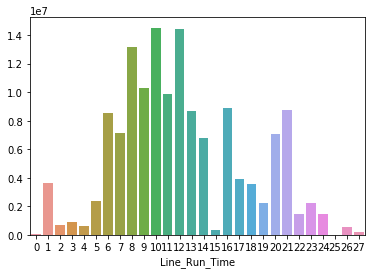

In [30]:
sns.barplot(x=df_RunTimePerDay.index, y=df_RunTimePerDay.Errors_Run_Time.values)
plt.show()

In [31]:
RunTimeErrorsPerDayErrors = dfRunTimeErrorsPerDay(df,1)
RunTimeErrorsPerDayWarnings = dfRunTimeErrorsPerDay(df,2)
RunTimeErrorsPerDayInformations = dfRunTimeErrorsPerDay(df,3)

In [32]:
myRunTimeErrorsPerDayErrorsArray = np.asarray(RunTimeErrorsPerDayErrors)
myRunTimeErrorsPerDayWarningsArray = np.asarray(RunTimeErrorsPerDayWarnings)
myRunTimeErrorsPerDayInformationsArray = np.asarray(RunTimeErrorsPerDayInformations)

#print(myColumnsLineArray)
#print(myRunTimeErrorsPerDayErrorsArray)

df_RunTimeErrorsPerDayErrors = pd.DataFrame()
df_RunTimeErrorsPerDayErrors["Line_Run_Time"] = myColumnsLineArray
df_RunTimeErrorsPerDayErrors = df_RunTimeErrorsPerDayErrors.set_index("Line_Run_Time")
df_RunTimeErrorsPerDayErrors["Errors_Run_Time"] = myRunTimeErrorsPerDayErrorsArray
#df_RunTimeErrorsPerDayErrors["Warning_Run_Time"] = myRunTimeErrorsPerDayWarningsArray
#df_RunTimeErrorsPerDayErrors["Informations_Run_Time"] = myRunTimeErrorsPerDayInformationsArray
df_RunTimeErrorsPerDayErrors = df_RunTimeErrorsPerDayErrors.astype(float)

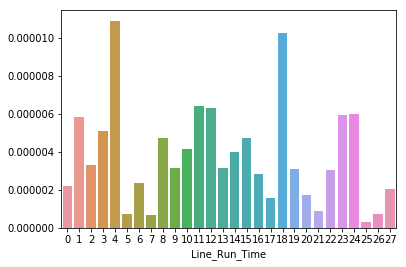

In [33]:
sns.barplot(x=df_RunTimeErrorsPerDayErrors.index, y=df_RunTimeErrorsPerDayErrors.Errors_Run_Time.values)
plt.show()